In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_fragments, global_solution, multi_segmentation, segment_EV
from Single_nuclei_segmentation import Solv, segmented
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage import gaussian_filter

from cvxopt import matrix

from skimage.measure import regionprops
import numpy as np

5it [00:00, 42.94it/s]


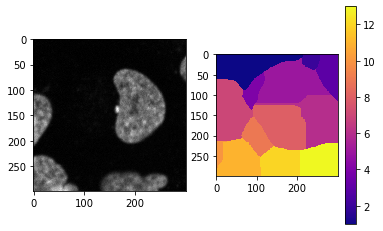

In [2]:
image = plt.imread('images/dna-images/gnf/dna-0.png')[200:500, 200:500 ,0]
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [3]:
Z = list(S)
ListOfCoords = create_images(image, Omega, Z)

In [4]:
theta, f = optimise_fragments(image, ListOfCoords)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-2)]: Done  18 out of  28 | elapsed:   14.1s remaining:    7.8s
[Parallel(n_jobs=-2)]: Done  21 out of  28 | elapsed:   16.1s remaining:    5.4s
[Parallel(n_jobs=-2)]: Done  24 out of  28 | elapsed:   18.2s remaining:    3.0s
[Parallel(n_jobs=-2)]: Done  28 out of  28 | elapsed:   20.1s finished


In [5]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

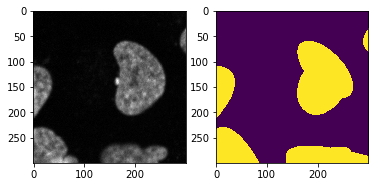

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image,cmap='gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(seg)

In [7]:
u = global_solution(f, np.median(f), Omega, list(S))

In [8]:
np.nonzero(u)

(array([ 1,  8, 14, 16, 17, 19, 23, 24, 25]),)

In [9]:
print(f)

(4527.713935717117, 3.535843395816445e-06, 39.02182977584638, 7722.191618021555, 9898.53915166422, 6527.6305969662835, 6.48862293469986, 2.094634406652908e-06, 545.7968857070422, 3069.7728143520694, 421.03787621295555, 5464.992771536251, 1409.6166169856263, 1409.6174240865328, 236.05553061494726, 484.02323134720837, 9.317802049010075e-07, 828.2057856648072, 308.96730812627965, 221.66383975000636, 2.4470359836759677e-06, 2.5789340450895584e-07, 4527.71324190343, 308.9677555346634, 120.69347757725471, 38.76633377357244, 176.81320050904176, 1146.038283410088)


In [10]:
np.array(f)[u == 1]


array([3.53584340e-06, 5.45796886e+02, 2.36055531e+02, 9.31780205e-07,
       8.28205786e+02, 2.21663840e+02, 3.08967756e+02, 1.20693478e+02,
       3.87663338e+01])

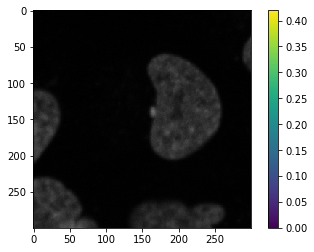

In [11]:
theta, f = Solv(image,ListOfCoords[1])
segmentation = segmented(image,theta,40)
plt.imshow(segmentation)
plt.colorbar()
plt.show()

In [12]:
a = np.array([np.inf,1,2])